
# Project: Investigate a Dataset (No-show-appointments)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

>This dataset collects informationfrom 100k  **medical appointments** appointments in Brazil and is focused on the questionof whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.

>>Therefore, the aim of the study is to find out which factors have the greatest impact on preventing the patient from attending his appointment and which have the least effect.

Thus, knowing this information will help us in the future to predict the best decisions that must be taken to reduce the factors that may lead to preventing the patient from attending his appointment.

The data contain of 13 row. Almost columns are clear from column name as age and gender. But others not the same, so I will clear them.

**AppointmentDay:** Day that the patient visited hospital.

**ScheduledDay:** Date and time that sechedled to check with doctors at the hospital.

**Neighbourhood:** Hospital name.

**Scholarship:** Is patient coverd from medical or not.

**Hipertension:** High blood pressure disease.

**Diabetes:** Diabetes mellitus.

**Alcoholism:** Alcohol addiction disease.

**Handcap:** Physical disability such as paralysis of the legs.

**No-show:** Yes for absent which mean he already didn't show or come.



> Here are some important questions that we must answer through our analysis of the data.


**Question 1:**  The period between **AppointmentDay** and **ScheduledDay**.

**Question 2:** clarify if specific time has almost absent as (hour - day - week - month - year).

**Question 3:** Who is more committed to attending the appointment, male or female?

**Question 4:** Does Receiving SMS Affect the patient to attend his appointment?

**Question 5:** Which residential areas are most committed to attending the appointment and which are the least?

**Question 6:** Does the location of the hospitals has effect?

**Question 7:** Which ages are the most missed of her appointment and which are the most attended?

**Question 8:** What is the effect of 'Handcap' on the patient's attendance of the appointment?

**Question 9:** Does disease as "Hipertension - Diabetes - Alcoholism has Effect on attendance ?

**Question 10:** Does Scholarship has effect on attendance ratio?

**Question 11:** Is there any causal relationship between patients' absence and any of the other variables?


### Importing Lib

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# Removing warn .
pd.options.mode.chained_assignment = None  # default='warn'

<a id='wrangling'></a>
## Data Wrangling



#### 1- Gathering data and create copy

In [3]:
df_original = pd.read_csv('no_show.csv')

In [4]:
# DataFrame copy
df = df_original.copy()

#### 2- Assessing data

In [5]:
df.head(2)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589980e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB



> * Some data types must be changed, as ScheduledDay must be date and time not text.

> * Drop usless columns as PatientId and AppointmentID.


In [7]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.920000e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172615e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173180e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439170e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999820e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


> * Not valid to be Age less than Zero

In [8]:
# print the column labels in the dataframe
for i, v in enumerate(df.columns):
    print(i, v)

0 PatientId
1 AppointmentID
2 Gender
3 ScheduledDay
4 AppointmentDay
5 Age
6 Neighbourhood
7 Scholarship
8 Hipertension
9 Diabetes
10 Alcoholism
11 Handcap
12 SMS_received
13 No-show


In [9]:
# Check Duplication
sum(df.duplicated())

0

In [10]:
# check null values in df : 
pd.DataFrame(df.isnull().sum().sort_values(ascending=False))

,0
PatientId,0
AppointmentID,0
Gender,0
ScheduledDay,0
AppointmentDay,0
Age,0
Neighbourhood,0
Scholarship,0
Hipertension,0
Diabetes,0


> * No null values found.

> * No Duplication found.

### Data Cleaning 

#### Cleaning ( Dropp row contain age less than Zero)

In [11]:
#extract outlier index row number(index)
dflowerzero = df.loc[df["Age"] < 0]
dflowerzero

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659430e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


In [12]:
df.index[df['Age'] == -1].tolist()

[99832]

In [13]:
df = df.drop([99832], axis=0)

In [14]:
df.loc[df["Age"] < 0]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show


#### Cleaning: Dropped useless data (PatientId, AppointmentID

In [15]:
df = df.drop(['PatientId','AppointmentID'], axis=1)

#### Combaring between the Original data set and the another one

In [16]:
print(df.shape)
print(df_original.shape)

(110526, 12)
(110527, 14)


#### Cleaning: Convert ( ScheduledDay & AppointmentDay) to Data and time

#####   Remove last Char (z) from date and time¶

In [17]:
df['ScheduledDay'] = df['ScheduledDay'].map(lambda x: str(x)[:-1])
df['AppointmentDay'] = df['AppointmentDay'].map(lambda x: str(x)[:-1])

In [18]:
df.sample()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
68801,F,2016-05-03T08:02:40,2016-05-17T00:00:00,36,TABUAZEIRO,0,0,0,0,0,0,No


##### Converting to date and time

In [19]:
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

In [20]:
# Check data type after converting
print(df['ScheduledDay'].dtypes)
print(df['AppointmentDay'].dtypes)

datetime64[ns]
datetime64[ns]


### Cleaning:  Rename  column name (No_Show) to (attend) Due to meaning conflict,
### And convrt it's values to (0,1). As 1 for attend.

In [21]:
# rename No_Show col
df.rename(columns={'No-show': 'attend'}, inplace=True)
df = df.replace({'attend': {'Yes': 0, 'No': 1 }})

In [22]:
# Recheck attend column
df.head(1)

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,attend
0,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,1


#### Distributing age numbers for categories as ( Infant - Toddler - Kid - Teen - Adult).

In [23]:
bins=  [0,         2,       4,    13,    20,      110]
labels =      ['Infant','Toddler','Kid','Teen', 'Adult']
df['Age_category'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

In [24]:
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,attend,Age_category
0,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,1,Adult
1,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,1,Adult
2,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,1,Adult
3,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1,Kid
4,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,1,Adult


<a id='eda'></a>
## Exploratory Data Analysis




In [25]:
# function to plot the distribution of categorical variable 
# since the countplot function show the counts of observations in each categorical bin using bars.
def countplot_ratio(x = None, data = None, hue = None, ax = None):
    # plot the variable
    ax = sns.countplot(x, data = data, hue = hue, ax = ax)
    # names of x labels
    ax.set_xticklabels(ax.get_xticklabels())
    # plot title
    ax.set_title(x + " Distribution")
    # total number of data which used to get the proportion
    total = float(len(data))
    # for loop to iterate on the patches
    for patch in ax.patches:
        # get the height of the patch which represents the number of observations.
        height = patch.get_height()
        # Put text on each patch with the proportion of the observations
        ax.text(patch.get_x()+patch.get_width()/2,height+4,'{:.2f}%'.format((height/total)*100),weight = 'bold',
                fontsize = 12,ha = 'center')

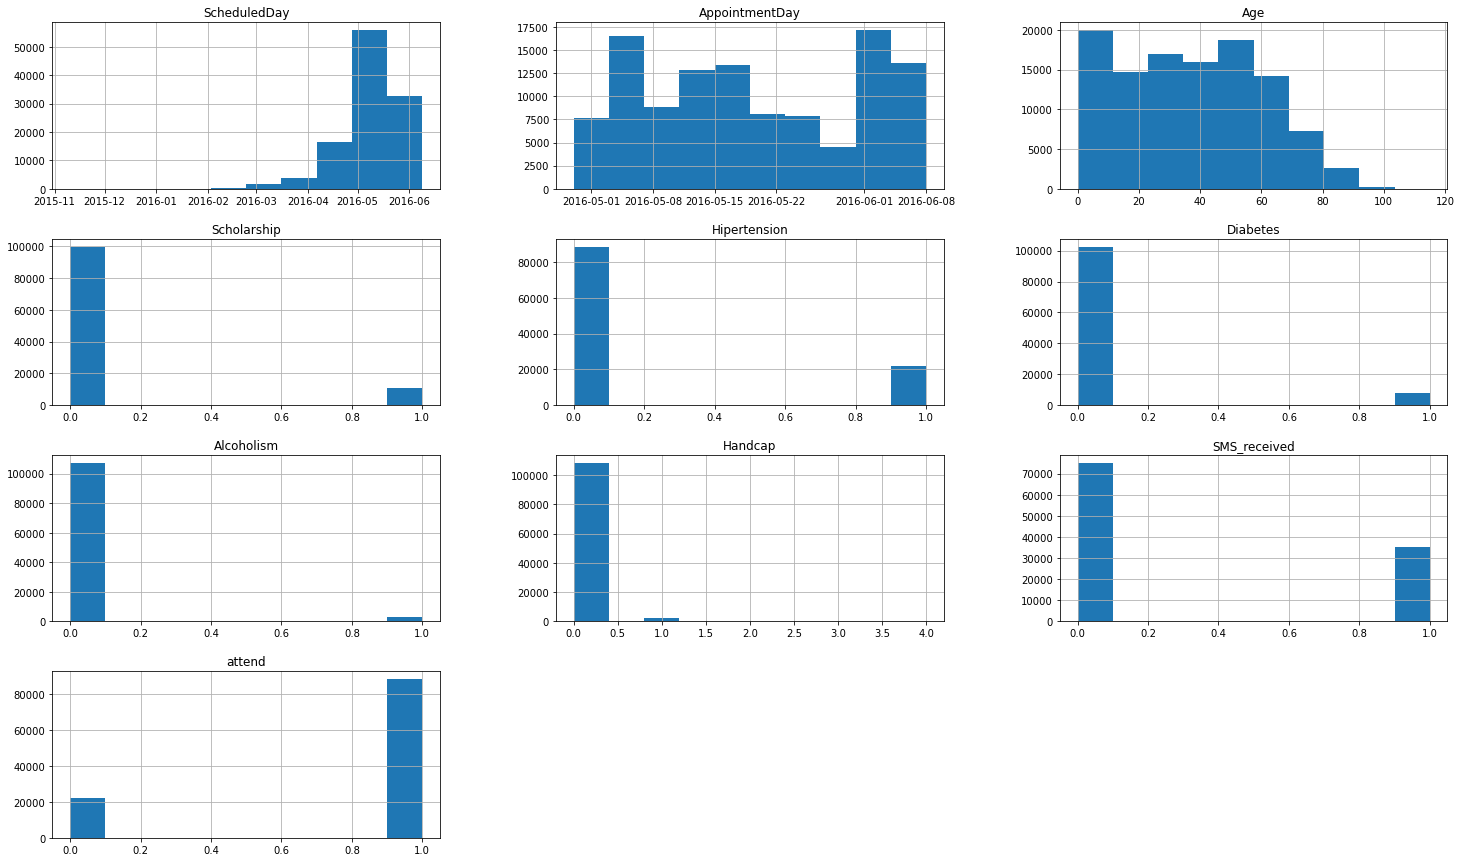

In [26]:
# Show Histogram for all columns
df.hist(figsize=(25,15));


### Research Question 1 (The period between AppointmentDay and ScheduledDay)

In [27]:
# Create New column for the period per days called difference
df['difference'] = df['ScheduledDay']- df['AppointmentDay']

In [28]:
# Check the difference
df['difference'].dt.days

0          0
1          0
2          0
3          0
4          0
          ..
110522   -35
110523   -35
110524   -41
110525   -41
110526   -41
Name: difference, Length: 110526, dtype: int64

In [29]:
# Check 
df.sample()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,attend,Age_category,difference
55996,M,2016-05-09 14:17:40,2016-05-09,4,SÃO JOSÉ,0,0,0,0,0,0,1,Kid,0 days 14:17:40


> All difference must be positive values, but we found negative values. So will check to drop it.

In [30]:
df.sort_values(by=['difference'])

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,attend,Age_category,difference
102795,F,2015-12-07 10:40:59,2016-06-03,27,SÃO CRISTÓVÃO,1,0,0,0,0,1,0,Adult,-179 days +10:40:59
102797,F,2015-12-07 10:42:42,2016-06-03,48,MARUÍPE,0,1,1,0,0,1,1,Adult,-179 days +10:42:42
102796,F,2015-12-07 10:43:01,2016-06-03,80,SÃO CRISTÓVÃO,0,1,1,0,0,1,1,Adult,-179 days +10:43:01
102799,F,2015-12-07 10:43:17,2016-06-03,74,SÃO CRISTÓVÃO,0,1,1,0,0,1,1,Adult,-179 days +10:43:17
102786,M,2015-12-07 10:43:34,2016-06-03,67,MARUÍPE,0,1,1,0,0,0,1,Adult,-179 days +10:43:34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72362,M,2016-05-04 06:50:57,2016-05-03,7,TABUAZEIRO,0,0,0,0,0,0,0,Kid,1 days 06:50:57
27033,M,2016-05-10 10:51:53,2016-05-09,38,RESISTÊNCIA,0,0,0,0,1,0,0,Adult,1 days 10:51:53
64175,F,2016-05-05 13:43:58,2016-05-04,22,CONSOLAÇÃO,0,0,0,0,0,0,0,Adult,1 days 13:43:58
55226,F,2016-05-18 14:50:41,2016-05-17,19,SANTO ANTÔNIO,0,0,0,0,1,0,0,Teen,1 days 14:50:41


### Splitting DataFrame to 2 DataFrames ( Positive and Negative) based on difference

In [31]:
# Creating new DataFrame has Positive days
df_Positive = df[df["difference"].dt.days >= 0]
df_Positive.sample()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,attend,Age_category,difference
11615,F,2016-05-06 13:14:18,2016-05-06,36,BELA VISTA,1,1,1,0,0,0,1,Adult,0 days 13:14:18


In [32]:
# Creating new DataFrame has negative days
df_negative = df[df["difference"].dt.days < 0]
df_negative.sample()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,attend,Age_category,difference
79146,M,2016-04-25 07:11:15,2016-05-31,82,SÃO CRISTÓVÃO,0,1,0,0,0,0,0,Adult,-36 days +07:11:15


> After exploring that we have wrong entry, as we found more ScheduledDay before AppointmentDay
We will check the percentage of right data from all data

In [33]:
print(df_Positive.shape)
print(df_negative.shape)
print(df.shape)

(38567, 14)
(71959, 14)
(110526, 14)


In [34]:
ratio_for_postive_from_all_data   =round(len(df_Positive.index) / len(df.index) *100)
ratio_for_postive_from_all_data

35

> It mean that, almost of our data are not valid. True data about **35%**  only.

>So any decision will not be accurate.


### Research Question 2 (Clarify if specific time as (hour - day - week - month) has almost absenteeism.

#### SO we will create new 5 columns for (hour - day - week - month)

In [35]:
df_Positive['hour'] = pd.to_datetime(df_Positive['ScheduledDay']).dt.hour
df_Positive['day']  = pd.to_datetime(df_Positive['ScheduledDay']).dt.isocalendar().day
df_Positive['week'] = pd.to_datetime(df_Positive['ScheduledDay']).dt.isocalendar().week
df_Positive['month']= pd.to_datetime(df_Positive['ScheduledDay']).dt.month

In [36]:
df_Positive.sample()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,attend,Age_category,difference,hour,day,week,month
81249,F,2016-05-13 12:36:05,2016-05-13,34,INHANGUETÁ,0,0,0,0,0,0,1,Adult,0 days 12:36:05,12,5,19,5


> We will split Positive DataFrame for 2 DataFrames ( Attend and absent) based on attendance column


In [37]:
df_attend = df_Positive.query('attend == 1')
df_absent = df_Positive.query('attend == 0')

In [38]:
df_attend.sample()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,attend,Age_category,difference,hour,day,week,month
41246,F,2016-05-05 16:52:46,2016-05-05,51,JABOUR,0,0,0,0,0,0,1,Adult,0 days 16:52:46,16,4,18,5


> Checking Every period as hour, between attend and absent to know the reason for absence

#### Check Hour ecffective

C:\Users\lenovo.4K\anaconda3.0\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
posx and posy should be finite values
posx and posy should be finite values


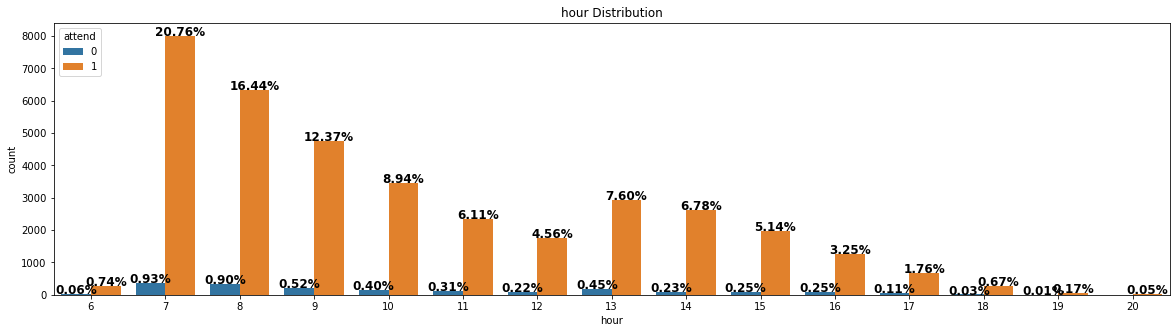

In [39]:
plt.figure(figsize = (20,5))
countplot_ratio(x='hour' ,data = df_Positive, hue = 'attend')

#### Check Day ecffective

C:\Users\lenovo.4K\anaconda3.0\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
posx and posy should be finite values
posx and posy should be finite values


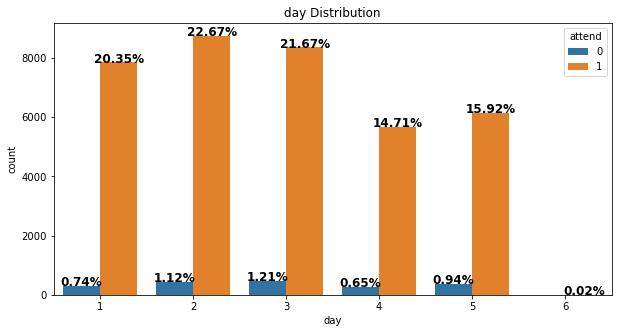

In [40]:
plt.figure(figsize = (10,5))
countplot_ratio(x='day' ,data = df_Positive, hue = 'attend')

#### Check Week ecffective

C:\Users\lenovo.4K\anaconda3.0\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


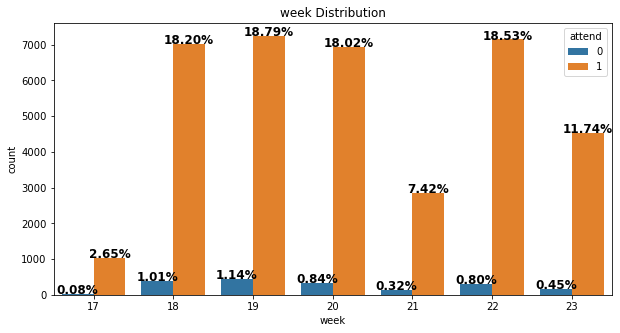

In [41]:
plt.figure(figsize = (10,5))
countplot_ratio(x='week' ,data = df_Positive, hue = 'attend')

#### Check Month ecffective

C:\Users\lenovo.4K\anaconda3.0\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


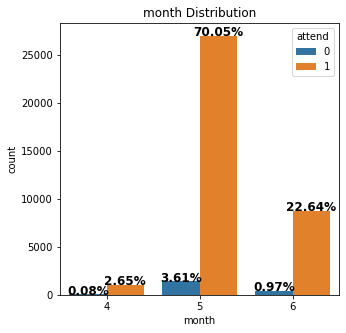

In [42]:
plt.figure(figsize = (5,5))
countplot_ratio(x='month' ,data = df_Positive, hue = 'attend')

>> From the previous visualization, no differnce in the distribution between attend and absent patients, So the time has no effective on patients attendance


### Research Question 3 (Who is more committed to attending the appointment, male or female)? 

In [43]:
ratio_for_female_absent =round(len(df_absent.loc[df_absent["Gender"] == 'F']) / (len(df_absent.loc[df_absent["Gender"] ==  'M'])+len(df_absent.loc[df_absent["Gender"] ==  'F']))  *100)
ratio_for_male_absent   =round(len(df_absent.loc[df_absent["Gender"] == 'M']) / (len(df_absent.loc[df_absent["Gender"] ==  'M'])+len(df_absent.loc[df_absent["Gender"] ==  'F']))  *100)
ratio_for_female_attend =round(len(df_attend.loc[df_attend["Gender"] == 'F']) / (len(df_attend.loc[df_attend["Gender"] ==  'M'])+len(df_attend.loc[df_attend["Gender"] ==  'F']))  *100)
ratio_for_male_attend   =round(len(df_attend.loc[df_attend["Gender"] == 'M']) / (len(df_attend.loc[df_attend["Gender"] ==  'M'])+len(df_attend.loc[df_attend["Gender"] ==  'F']))  *100)

In [44]:
percentage ="Ratio of Males who's attend is {male_attend}% ,however males who's absent is {male_absent}%, and \nRatio for Females who's attend is {female_attend}%, however Females who's absent is {female_absent}%".format(male_attend = ratio_for_male_attend, male_absent = ratio_for_male_absent,female_attend = ratio_for_female_attend,female_absent = ratio_for_female_absent)
print(percentage)

Ratio of Males who's attend is 38% ,however males who's absent is 49%, and 
Ratio for Females who's attend is 62%, however Females who's absent is 51%


C:\Users\lenovo.4K\anaconda3.0\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


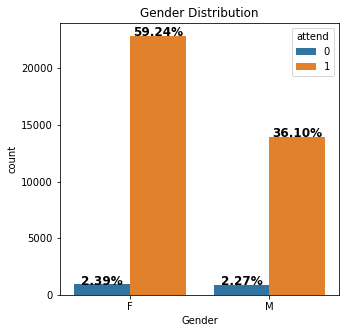

In [45]:
plt.figure(figsize = (5,5))
countplot_ratio(x='Gender' ,data = df_Positive, hue = 'attend' )

> There is no significant effect Between Males and Females in attendance percentage.
> The percentage of female attendance is the highest, and therefore the percentage of absence among men is the highest.

### Research Question 4 (Does Receiving SMS Affect the patient to attend his appointment)? 

C:\Users\lenovo.4K\anaconda3.0\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


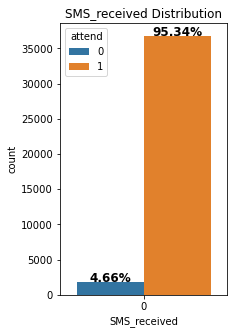

In [46]:
plt.figure(figsize = (3,5))
countplot_ratio(x='SMS_received' ,data = df_Positive, hue = 'attend' )

In [47]:
df_Positive['SMS_received'].value_counts()

0    38567
Name: SMS_received, dtype: int64

> There is no effect for receiving SMS, As no one received any SMS.

### Research Question 5 (Which residential areas are most committed to attending the appointment and which are the least)? 

In [48]:
df_attend['Neighbourhood'].value_counts().head()

JARDIM CAMBURI     2398
MARIA ORTIZ        1994
RESISTÊNCIA        1564
SANTA MARTHA       1450
JARDIM DA PENHA    1188
Name: Neighbourhood, dtype: int64

In [49]:
df_absent['Neighbourhood'].value_counts().head()

JARDIM CAMBURI    106
MARIA ORTIZ        81
SANTO ANTÔNIO      71
SÃO PEDRO          64
SANTOS DUMONT      63
Name: Neighbourhood, dtype: int64

> Normal distribuation found. As alomost of top 5 for attendance hospitals are included in absentiseem hospital, So Neighbourhood has no effect.

### Research Question 6 (Does the location of the hospitals has effect)? 

In [50]:
# Checked by map location for absent top 5 

from IPython.core.display import display, HTML
display(HTML("""<a href="https://www.google.com/maps/place/Jardim+Camburi,+%D9%81%D9%8A%D8%AA%D9%88%D8%B1%D9%8A%D8%A7+-+%D8%A5%D8%B3%D8%A8%D9%8A%D8%B1%D9%8A%D8%AA%D9%88+%D8%B3%D8%A7%D9%86%D8%AA%D9%88%D8%8C+%D8%A7%D9%84%D8%A8%D8%B1%D8%A7%D8%B2%D9%8A%D9%84%E2%80%AD/@-20.2639713,-40.2602354,14z/data=!4m5!3m4!1s0xb819ace24642c9:0x495008709e51ef5c!8m2!3d-20.2592187!4d-40.2654531">JARDIM CAMBURI</a>"""))
display(HTML("""<a href="https://www.google.com/maps/place/Maria+Ortiz,+%D9%81%D9%8A%D8%AA%D9%88%D8%B1%D9%8A%D8%A7+-+%D8%A5%D8%B3%D8%A8%D9%8A%D8%B1%D9%8A%D8%AA%D9%88+%D8%B3%D8%A7%D9%86%D8%AA%D9%88%D8%8C+%D8%A7%D9%84%D8%A8%D8%B1%D8%A7%D8%B2%D9%8A%D9%84%E2%80%AD/@-20.2601621,-40.2916723,15.5z/data=!4m9!1m2!2m1!1sMARIA+ORTIZ!3m5!1s0xb818723ef3fe0b:0x27c3bd40a916f71!8m2!3d-20.258305!4d-40.2999279!15sCgtNQVJJQSBPUlRJWpIBDHN1YmxvY2FsaXR5MQ">MARIA ORTIZ</a>"""))
display(HTML("""<a href="https://www.google.com/maps/place/%D8%B3%D8%A7%D9%86%D8%AA%D9%88+%D8%A3%D9%86%D8%B7%D9%88%D9%86%D9%8A%D9%88+%D8%AF%D9%8A+%D8%AC%D9%8A%D8%B3%D9%88%D8%B3%D8%8C+Santo+Ant%C3%B4nio+de+Jesus+-+%D8%A8%D8%A7%D9%87%D9%8A%D8%A7%D8%8C+%D8%A7%D9%84%D8%A8%D8%B1%D8%A7%D8%B2%D9%8A%D9%84%E2%80%AD/@-12.9711001,-39.2483103,14z/data=!3m1!4b1!4m5!3m4!1s0x73e2a45a6a3f323:0x946c6ae973aa35c2!8m2!3d-12.9698503!4d-39.2617368">SANTO ANTÔNIO</a>"""))
display(HTML("""<a href="https://www.google.com/maps/place/S%C3%A3o+Pedro+-+%D9%88%D9%84%D8%A7%D9%8A%D8%A9+%D8%B3%D8%A7%D9%88+%D8%A8%D8%A7%D9%88%D9%84%D9%88%D8%8C+13520-000%D8%8C+%D8%A7%D9%84%D8%A8%D8%B1%D8%A7%D8%B2%D9%8A%D9%84%E2%80%AD/@-22.5580161,-47.7914414,11z/data=!3m1!4b1!4m5!3m4!1s0x94c7a557fbcc35a5:0xefef1b331ec78a14!8m2!3d-22.5516736!4d-47.9103721">SÃO PEDRO</a>"""))
display(HTML("""<a href="https://www.google.com/maps/place/Santos+Dumont,+%D9%85%D9%8A%D9%86%D8%A7%D8%B3+%D8%AC%D9%8A%D8%B1%D8%A7%D9%8A%D8%B3%D8%8C+36240-000%D8%8C+%D8%A7%D9%84%D8%A8%D8%B1%D8%A7%D8%B2%D9%8A%D9%84%E2%80%AD/@-21.4588344,-43.5290321,14z/data=!3m1!4b1!4m5!3m4!1s0xa2120f44708ed3:0x3d582b0a2761c80c!8m2!3d-21.4562631!4d-43.5519273">SANTOS DUMONT</a>"""))

> There are no common geographic factors as to why these hospitals are absent from patients.

### Research Question 7 (Which ages are the most missed of it's appointment and which are the most attended)? 

C:\Users\lenovo.4K\anaconda3.0\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


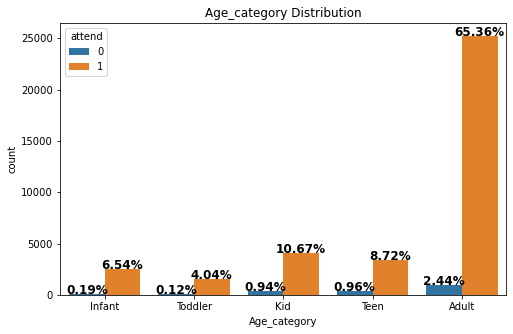

In [51]:
plt.figure(figsize = (8,5))
countplot_ratio(x='Age_category' ,data = df_Positive, hue = 'attend' )

> It seems that the ratio of absentiseem is normal comparing to the attendance for every age categories.

> The lowest absenteeism rate is in the younger ages and increases in the older ages.

> The incidence of infection in adults is greater than in all other ages combined.

### Research Question 8 (What is the effect of 'Handcap' on the patient's attendance of the appointment)? 

C:\Users\lenovo.4K\anaconda3.0\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
posx and posy should be finite values
posx and posy should be finite values


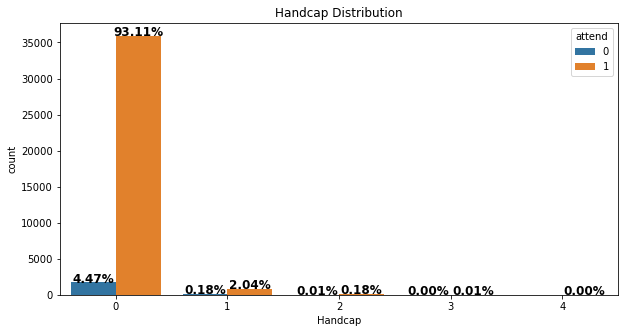

In [52]:
plt.figure(figsize = (10,5))
countplot_ratio(x='Handcap' ,data = df_Positive, hue = 'attend' )

> Handicap level is not an absolute reason, as most absenteeism is in patients without any obstruction. However, the higher percentage of disability, the greater commitment to attend on time with the lower absenteeism rate.

### Research Question 9 (Effect disease "Hipertension - Diabetes - Alcoholism")? 

C:\Users\lenovo.4K\anaconda3.0\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


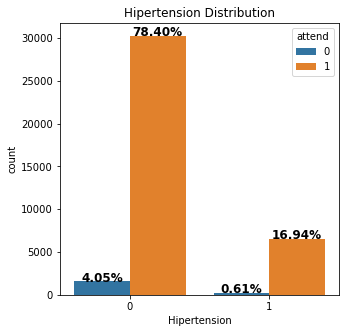

In [53]:
plt.figure(figsize = (5,5))
countplot_ratio(x='Hipertension' ,data = df_Positive, hue = 'attend' )

C:\Users\lenovo.4K\anaconda3.0\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


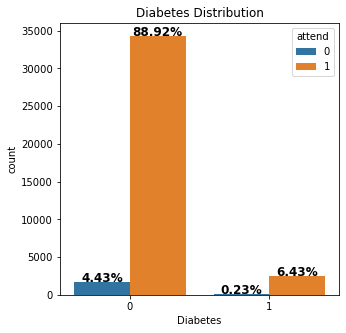

In [54]:
plt.figure(figsize = (5,5))
countplot_ratio(x='Diabetes' ,data = df_Positive, hue = 'attend' )

C:\Users\lenovo.4K\anaconda3.0\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


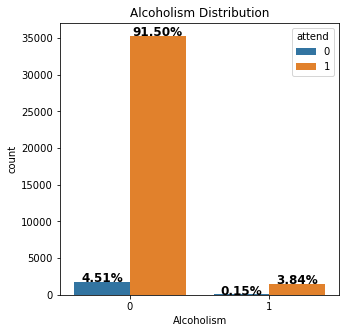

In [55]:
plt.figure(figsize = (5,5))
countplot_ratio(x='Alcoholism' ,data = df_Positive, hue = 'attend' )

> Almost of who's absent are without any disease , so it's not the reason.

### Research Question 10 (Does Scholarship has effect on attendance ratio)?

C:\Users\lenovo.4K\anaconda3.0\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


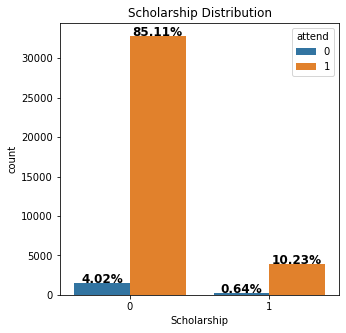

In [56]:
plt.figure(figsize = (5,5))
countplot_ratio(x='Scholarship' ,data = df_Positive, hue = 'attend' )

> Almost of who's attend are without Scholarship, so it's not the reason.

### Research Question 11 (Is there any causal relationship between patients' absence and any of the other variables)?

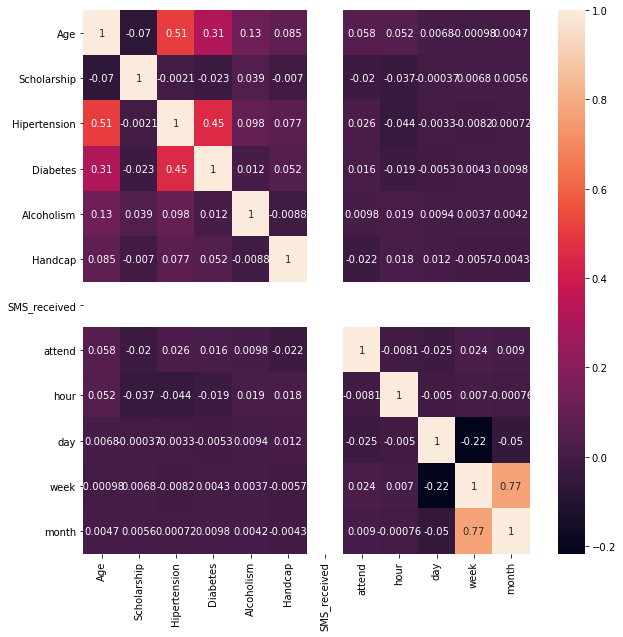

In [57]:
#Heatmap for correlation
plt.figure(figsize = (10,10))
sns.heatmap(df_Positive.corr(),annot = True);

> There is no relationship between the absence of patients and any independent variables.

<a id='conclusions'></a>
## Conclusions

> **1**: Almost of our data are not valid. True data about 35% only. As about 65% from data has ScheduledDay before AppointmentDay, which not valid.So any decision will not be accurate.

> **2**: Time has no effective on patients attendance, as no differnce in the distribution at any specific period between attend and absent patients.

> **3**: There is no significant effect Between Males and Females in attendance percentage. The percentage of female attendance is the highest, and therefore the percentage of absence among men is the highest.

> **4**: There is no effect for receiving SMS, As no one received any SMS.

> **5**: Most of the hospitals in **top 5 for absent** are in **top 5 for attend**. So it appears that there are no specific reasons in specific hospitals that are the reason for non-attendance. 

> **6**: There are no common geographic factors as to why these hospitals are absent from patients.

> **7**: Absenteeism appears to be normal compared to attendance for each age group.

> **8**: Absenteeism decreases at younger ages and increases at older ages.

> **9**: The incidence of infection in adults is greater than in all other ages combined.

> **10**: The level of disability is not an absolute reason for absenteeism, as most cases of absenteeism are in patients without any disability. However, the greater disability, the greater commitment to appearing on time with the lower the absenteeism rate.
          
> **11**: Most absentees have a lower sickness rate, so this is not the reason. Therefore, there is no specific disease that is the reason for the high rate of absenteeism.

> **12**: Almost of who's attend are without Scholarship, so Scholarship is not the reason.

> **13**:There is no relationship between the absence of patients and any independent variables.

> **14**: We have to get more accurate data, to find strong causal relationships to determine the reasons why patients miss their appointments. 